In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abish\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# Reading the Diabetes-Dataset file to perform the support vector machine
names=['Pregnancies', 'Glucose', 'BloodPressure', 
       'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Class']
df=pd.read_csv(r'C:\Users\abish\Downloads\WPC 300\New folder\pima-indians-diabetes.csv',skiprows=9, header=None,names=names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('The shape of Diabetes Dataset:', df.shape)

The shape of Diabetes Dataset: (768, 9)


In [4]:
# Remove missing values
df = df[df['Glucose'] != 0]
df = df[df['BloodPressure'] != 0]
df = df[df['SkinThickness'] != 0]
df = df[df['Insulin'] != 0]
df = df[df['BMI'] != 0]
df = df[df['Age'] != 0]
print('The shape of Diabetes Dataset:', df.shape)

The shape of Diabetes Dataset: (392, 9)


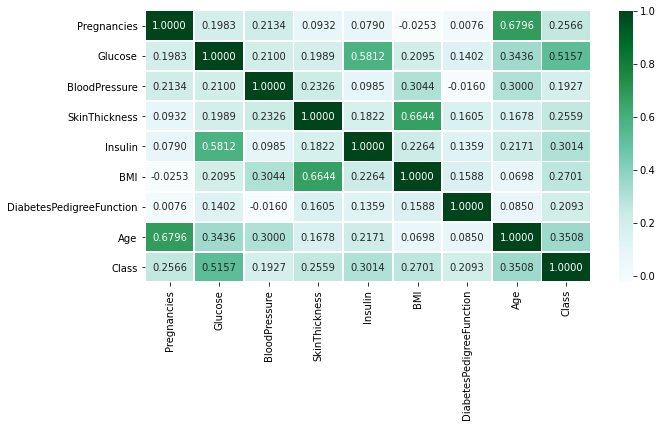

In [5]:
#Corelation Matrix
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), cmap = "BuGn", annot=True, linewidth=1, fmt='.4f', ax=ax)
plt.show()

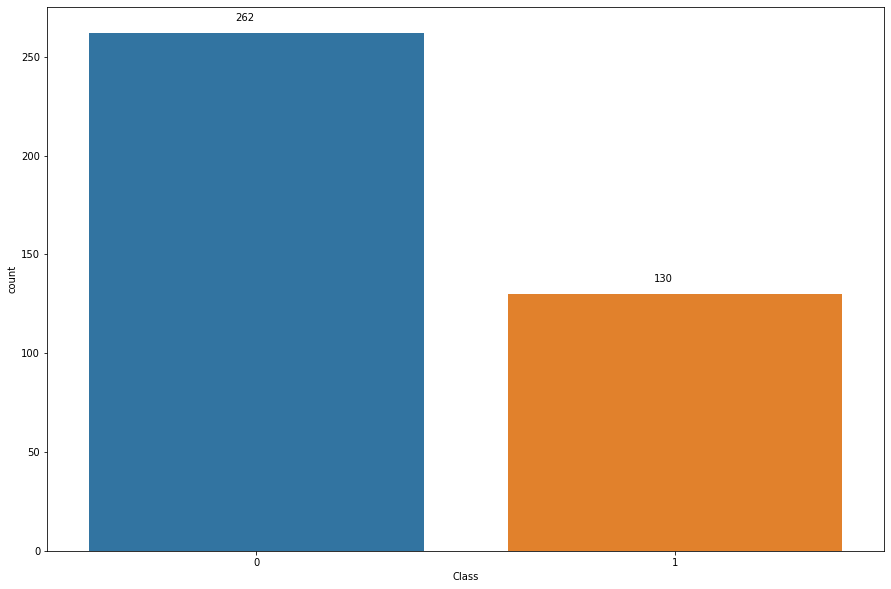

In [6]:
#Decision variable in the dataset is 'Class', countplot of the decision variable
plt.figure(figsize=(15,10))
Class_plot=sns.countplot(df.Class)
#To show the count of the respective class on a barplot 
for q in Class_plot.patches:
    Class_plot.annotate(str(q.get_height()), (q.get_x()+0.35, q.get_height()+5), va='bottom', color='black')
plt.show()

- As the counts of the target variable are in the ratio 1:2, we need to balance the data to predict the correct accuracy of the model

In [7]:
#Assigning the X and y
X=df.loc[:, df.columns != 'Class']
y=df.Class

In [8]:
#Summary of Statistics
# Mean, Median and Standard Deviation is calculated
pd.DataFrame({'Mean': X.mean(),'Median': X.median(),'Standard Deviation': X.std()})

,Mean,Median,Standard Deviation
Pregnancies,3.301020,2.0000,3.211424
Glucose,122.627551,119.0000,30.860781
BloodPressure,70.663265,70.0000,12.496092
SkinThickness,29.145408,29.0000,10.516424
Insulin,156.056122,125.5000,118.841690
BMI,33.086224,33.2000,7.027659
DiabetesPedigreeFunction,0.523046,0.4495,0.345488
Age,30.864796,27.0000,10.200777


In [9]:
# Covariance of X
X_Covariance=X.cov()
X_Covariance

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,10.313247,19.652043,8.561981,3.147933,30.144188,-0.572058,0.008390,22.263310
Glucose,19.652043,952.387781,80.994467,64.537672,2131.662900,45.439613,1.494605,108.179694
BloodPressure,8.561981,80.994467,156.152304,30.563156,146.295162,26.732178,-0.068951,38.245916
SkinThickness,3.147933,64.537672,30.563156,110.595171,227.710489,49.099706,0.583139,17.996692
Insulin,30.144188,2131.662900,146.295162,227.710489,14123.347226,189.081594,5.580072,263.163618
BMI,-0.572058,45.439613,26.732178,49.099706,189.081594,49.387994,0.385492,5.004782
DiabetesPedigreeFunction,0.008390,1.494605,-0.068951,0.583139,5.580072,0.385492,0.119362,0.299664
Age,22.263310,108.179694,38.245916,17.996692,263.163618,5.004782,0.299664,104.055842


K=5 fold Cross validation is performed for the svm by choosing the hyperparameters above and using it Grid Search CV
- The parameters that are changed from the SKLEARN defaults are:
    1.	Kernal: Linear, sigmoid, poly and rbf  ; default= rbf
    2.	C : 10^-3 to 10^3 ; default=1
    3.	Gamma: scale and auto ; default= scale
    4.	Probability= True, it is used to plot the roc curve
    5.	Class_weight= Balanced, it is used to adjust the weights of an imbalanced class. default= None
    6.	Random_state= Any Integer, default=None


In [10]:
kfold = model_selection.KFold(n_splits=5)
model_kfold = SVC()

In [11]:
parameters = {'kernel':['rbf'], 'C': [10**x for x in range(-3, 3)],'gamma': ['scale','auto'],'class_weight':['balanced']}
clf=GridSearchCV(model_kfold,parameters,cv=kfold,n_jobs=-1)

In [12]:
#Fitting the model
clf.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']})

In [13]:
#Creating a dataframe to print the result and sorting the mean test score in descending order
p=pd.DataFrame(clf.cv_results_).sort_values('mean_test_score',ascending=False)
p.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.008378,0.000798,0.002992,4.909339e-07,100,balanced,scale,rbf,"{'C': 100, 'class_weight': 'balanced', 'gamma'...",0.772152,0.620253,0.820513,0.820513,0.730769,0.752840,0.074295,1
8,0.007181,0.001466,0.002992,5.001110e-07,10,balanced,scale,rbf,"{'C': 10, 'class_weight': 'balanced', 'gamma':...",0.746835,0.632911,0.807692,0.833333,0.730769,0.750308,0.069803,2
6,0.006981,0.000631,0.002792,3.984692e-04,1,balanced,scale,rbf,"{'C': 1, 'class_weight': 'balanced', 'gamma': ...",0.721519,0.658228,0.769231,0.782051,0.666667,0.719539,0.050864,3
4,0.007381,0.000488,0.004588,2.239305e-03,0.1,balanced,scale,rbf,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...",0.721519,0.683544,0.730769,0.782051,0.641026,0.711782,0.047322,4
0,0.009374,0.000489,0.003792,7.468088e-04,0.001,balanced,scale,rbf,"{'C': 0.001, 'class_weight': 'balanced', 'gamm...",0.645570,0.569620,0.705128,0.743590,0.679487,0.668679,0.058998,5


In [14]:
#Grid Search2 
parameters1 = {'kernel':['sigmoid','linear','poly'], 'C': [10**x for x in range(-3, 3)],'class_weight':['balanced']}
clf1=GridSearchCV(model_kfold,parameters1,cv=kfold,n_jobs=-1)

In [15]:
#Fitting the model
clf1.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'kernel': ['sigmoid', 'linear', 'poly']})

In [16]:
#Creating a dataframe to print the result and sorting the mean test score in descending order
p1=pd.DataFrame(clf1.cv_results_).sort_values('mean_test_score',ascending=False)
p1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.111701,0.032818,0.001995,0.000631,0.1,balanced,linear,"{'C': 0.1, 'class_weight': 'balanced', 'kernel...",0.772152,0.620253,0.820513,0.846154,0.846154,0.781045,0.084816,1
4,0.013164,0.002034,0.001795,0.000399,0.01,balanced,linear,"{'C': 0.01, 'class_weight': 'balanced', 'kerne...",0.784810,0.607595,0.833333,0.820513,0.820513,0.773353,0.084443,2
1,0.006981,0.000892,0.002194,0.000746,0.001,balanced,linear,"{'C': 0.001, 'class_weight': 'balanced', 'kern...",0.784810,0.620253,0.820513,0.820513,0.807692,0.770756,0.076373,3
17,0.088172,0.054582,0.001794,0.000398,100,balanced,poly,"{'C': 100, 'class_weight': 'balanced', 'kernel...",0.746835,0.645570,0.807692,0.807692,0.807692,0.763096,0.063314,4
14,0.009966,0.001095,0.001803,0.000405,10,balanced,poly,"{'C': 10, 'class_weight': 'balanced', 'kernel'...",0.772152,0.594937,0.807692,0.833333,0.794872,0.760597,0.085159,5


- From the above result we came to know that the parameters for the best model are: C= 0.1, class_weight='balanced'. Kernel = linear and its mean test score is 78.1%

In [17]:
# Model prediction on the Train and Test set (20% of the data)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (313, 8) (313,)
Test set: (79, 8) (79,)


In [18]:
model = svm.SVC(kernel='linear',C=0.1, probability=True, random_state=30, class_weight='balanced')
model.fit(X_train, y_train)

SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True,
    random_state=30)

In [19]:
#After being fitted, the model can then be used to predict new values:
yhat = model.predict(X_test)
yhat [0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [20]:
y_pred_train = model.predict(X_train)
current_test_acc = metrics.accuracy_score(y_test, yhat)
print(current_test_acc)

0.759493670886076


In [21]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        52
           1       0.62      0.74      0.68        27

    accuracy                           0.76        79
   macro avg       0.74      0.75      0.74        79
weighted avg       0.77      0.76      0.76        79



In [22]:
# Accuracy (Train & Test) , Generalization Error for Train (1-Train Accuracy) and Test (1- Test Accuracy) is calculated:
print('Train Accuracy = {} '.format(accuracy_score(y_train, y_pred_train)))
print('Test Accuracy = {} '.format(accuracy_score(y_test, yhat)))
print('Generalization Error on Train = {}'.format(1.0-accuracy_score(y_train, y_pred_train)))
print('Generalization Error on Test = {}'.format(1.0-accuracy_score(y_test, yhat)))
print('Balanced Accuracy score = {}'.format(balanced_accuracy_score(y_train, y_pred_train)))

Train Accuracy = 0.7891373801916933 
Test Accuracy = 0.759493670886076 
Generalization Error on Train = 0.21086261980830667
Generalization Error on Test = 0.240506329113924
Balanced Accuracy score = 0.7711280628756356


In [24]:
# Compute confusion matrix for train dataset
cnf_matrix1 = confusion_matrix(y_train, y_pred_train, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_train, y_pred_train))
print(cnf_matrix1)


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       210
           1       0.67      0.72      0.69       103

    accuracy                           0.79       313
   macro avg       0.76      0.77      0.77       313
weighted avg       0.79      0.79      0.79       313

[[173  37]
 [ 29  74]]


In [26]:
# Compute confusion matrix for test dataset
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))
print(cnf_matrix)


              precision    recall  f1-score   support

           0       0.85      0.77      0.81        52
           1       0.62      0.74      0.68        27

    accuracy                           0.76        79
   macro avg       0.74      0.75      0.74        79
weighted avg       0.77      0.76      0.76        79

[[40 12]
 [ 7 20]]


In [27]:
y_test_prob = model.predict_proba(X_test)[:, 1]

In [28]:
from sklearn.metrics import roc_curve, auc
#Compute the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.849715


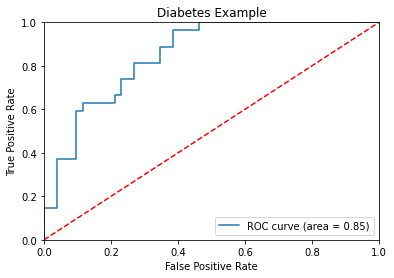

In [29]:
# Plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'r--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Diabetes Example')
pl.legend(loc="lower right")
pl.show()